Projet final : Il s'agit de l'historique des ventes de 45 magasins Walmart situés dans différentes régions aux US. Chaque magasin contient un certain nombre de départements et il s'agit de prévoir les ventes à l'échelle du département pour chaque magasin.

De plus, Walmart organise plusieurs événements promotionnels de démarque tout au long de l'année. Ces démarques précèdent les fêtes importantes, dont les quatre plus importantes sont le Super Bowl, la fête du Travail, Thanksgiving et Noël. 

Une partie du défi présenté par ce concours consiste à modéliser les effets des démarques sur ces semaines de vacances en l'absence de données historiques complètes / idéales.

# 1- Les librairies 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# 2- Code Book

In [2]:
Code_BOOk = pd.read_excel('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 3/Code Book Projet Final Module3.xlsx') 
Code_BOOk

,Features,Description,Observations
0,STORE :,le numéro de magasin,NaN
1,Date :,la semaine,NaN
2,Température :,température moyenne dans la région,l'unité de mésure de la température aux USA es...
3,Fuel_Price :,coût du carburant dans la région,Les magasins WALMART ont des stations services...
4,Démarques1-5 :,données anonymisées liées aux démarques promot...,NaN
5,CPI :,l'indice des prix à la consommation,qui mésure le taux de variation moyenne des pr...
6,Unemployment :,le taux de chômage,NaN
7,IsHoliday :,si la semaine est une semaine de vacances spé...,NaN
8,Dept :,N° du service,NaN
9,weeklysales:,ventes de la semaine,NaN


# ANALYSE EXPLORATOIRE

In [3]:
features = pd.read_csv('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 3/features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
features.Date.min()

'2010-02-05'

In [6]:
features.Date.max()

'2013-07-26'

In [7]:
stores = pd.read_csv('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 3/stores.csv')
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
train =  pd.read_csv('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 3/train.csv')
test = pd.read_csv('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 3/test.csv')


In [9]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [10]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [11]:
train.Date.min()

'2010-02-05'

In [12]:
train.Date.max()

'2012-10-26'

In [13]:
test.Date.min()

'2012-11-02'

In [14]:
test.Date.max()

'2013-07-26'

In [15]:
#sample_submission =   pd.read_csv('C:/Users/patri/Desktop/IRONHACK/GitHub/806_Repo/Projects/Projet final module 3/sampleSubmission.csv')
#sample_submission

Constat : je constate que dans nous avons 4 dossiers(datesets) avec différentes variables. les variables communent à ces 4 dossiers sont les variables: Store, Date, Isholiday.
- ma 1ere action serait de fusionner ces dossiers pour en avoir qu'un.

- La variable Date qui représente les dates(semaines) est catégorisée dans le type object. Il convient de la convertir en une variable de style date.

- Les variables Store et Dept bien que numériques sont des variables catégorielles il convient donc de les convertir également en Str

1- je fusionne les différents fichiers en utilisant la fonction merge

In [16]:
features_store = features.merge(stores)
features_store.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [17]:
sales = features_store.merge(train)
sales.shape
sales_main_test = features_store.merge(test)
sales_main_test.shape

(115064, 15)

In [18]:
sales_main_test

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept
0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,1
1,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,2
2,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,3
3,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,4
4,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,93
115060,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,94
115061,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,95
115062,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,97


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


je remarque qu'on 421570 lignes dans le dataset sales et 16 colonnes.
de types bool(1), float64(10), int64(3), object(2).
Les colonnes Store et Dept sont des variables continues (il faudra les transformer en variables cat)
la Date est une var catégorielle ( il faudra la transformer en type Date)

Recap:
- Objectif mésurable : Predire si les magasins de type A font du CA plus élevé que les mag du type B.
- les mag font-ils plus de chiffres durant Les jours fériés 
- mesure de performance des magasins
- métrique: Cette compétition est évaluée sur l'erreur absolue moyenne pondérée : WMAE=1∑wi∑i=1nwi|yi−y^i|

n est le nombre de lignes
y ^ i est les ventes prévues
yi correspond aux ventes réelles
wi sont des poids. w = 5 si la semaine est une semaine de vacances, 1 sinon

Analyse de forme :
- Variable target : weeklysale
- ligne et colonne : 421570, 16 une ligne correspond aux ventes par semaine dans un département/service du magasin 
- type de variables : nous avons au total 16 variables. 

2- Je convertie la colonne Date en type datetime et les colonnes Store et Dept en STR

In [20]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])
sales_main_test['Date'] = pd.to_datetime(sales_main_test['Date'])

In [21]:
features['Store'] = features['Store'].apply(str)
train['Store'] = train['Store'].apply(str)
test['Store'] = test['Store'].apply(str)
sales['Store'] = sales['Store'].apply(str)
sales_main_test['Store'] = sales_main_test['Store'].apply(str)

In [22]:
train['Dept'] = train['Dept'].apply(str)
test['Dept'] = test['Dept'].apply(str)
sales['Dept'] = sales['Dept'].apply(str)
sales_main_test['Dept'] = sales_main_test['Dept'].apply(str)

ANALYSE DE FOND
- NA:

Signification des variables:
- variables continues non standardisées, asymétriques      Température,Fuel_price,CPI,Weekly_sales Markdown(right skewed)et Unemployment.
- variables qualitatives, IsHoliday (binaire), Type ( Trinaire). JE fais un pairplot pour avoir une vison globale de la distribution

Avant cela je vais observer la distribution des données pour chacune de ses colonnes
Store 45 magasins
Dept 81 département
Date : 182 semaines

In [23]:
sales['Store'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [24]:
len(sales['Dept'].unique())

81

In [25]:
len(sales['Date'].unique())

143

In [26]:
len(sales_main_test['Date'].unique())

39

3-Analyse des valeurs manquantes 

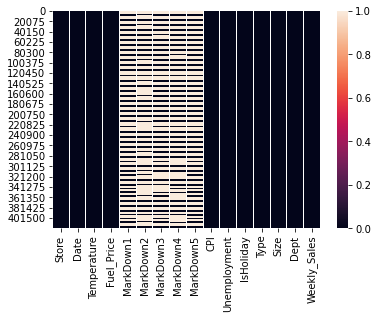

In [27]:
sns.heatmap(sales.isna())
# je remarque qu'il y a des valeurs manquantes dans les variables markdown 1-5

In [28]:
# mesurer le pourcentange des valeurs manquantes 
(sales.isna().sum()/sales.shape[0])
# les valeurs manquantes des Markdown situés entre 60% et 75%

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
IsHoliday       0.000000
Type            0.000000
Size            0.000000
Dept            0.000000
Weekly_Sales    0.000000
dtype: float64

5- Histogramme des variables continues

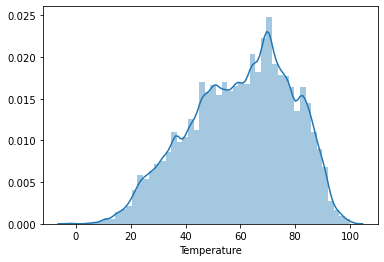

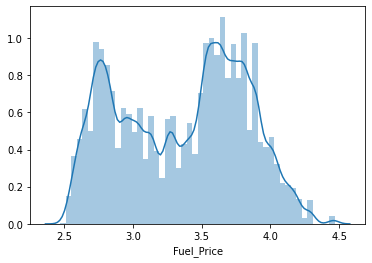

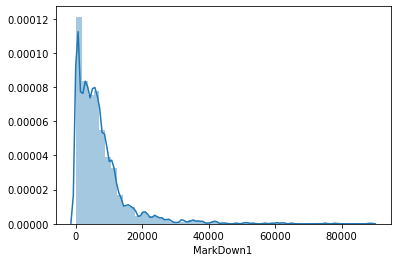

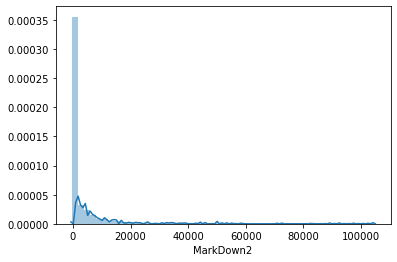

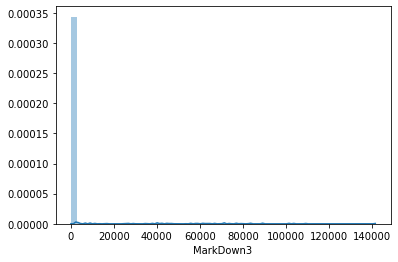

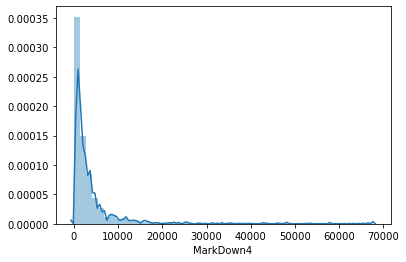

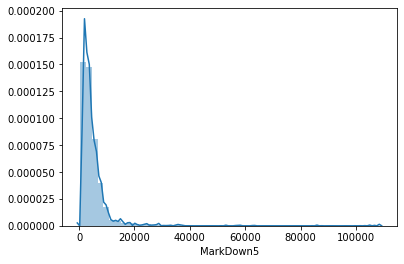

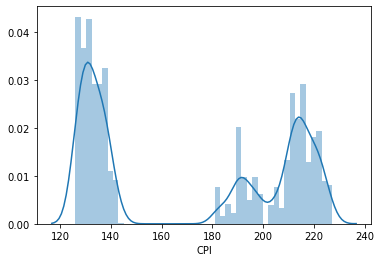

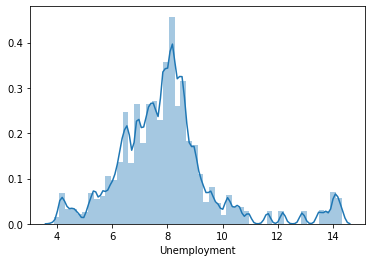

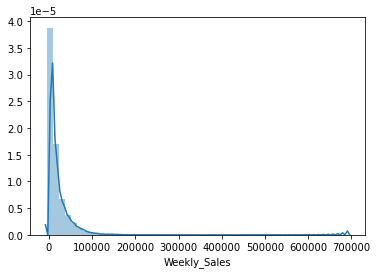

In [29]:
for col in sales.select_dtypes('float'):
    plt.figure()
    sns.distplot(sales[col])

6- Pie plot Variable Cat 

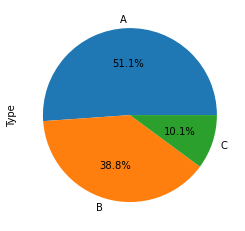

In [30]:
sales.Type.value_counts().plot.pie(autopct='%1.1f%%')
plt.savefig('Type.png')
plt.show()

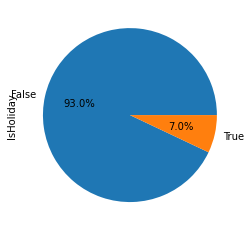

In [31]:
sales.IsHoliday.value_counts().plot.pie(autopct='%1.1f%%')
plt.savefig('ISholidays.png')
plt.show()

In [32]:
sales['Weeks'] = sales.Date.dt.week
sales['month'] = sales.Date.dt.month 
sales['Years'] = sales.Date.dt.year

7- Analyse bivariées

# Visualisation des moyennes de ventes de chaque type, magasins et services /an

In [33]:
weekly_sales_2011 = sales[sales['Years']==2011]

In [34]:
weekly_sales_2010 = sales[sales['Years']==2010]

In [35]:
weekly_sales_2012 = sales[sales['Years']==2012]

TYPES vs Weekly_Sales

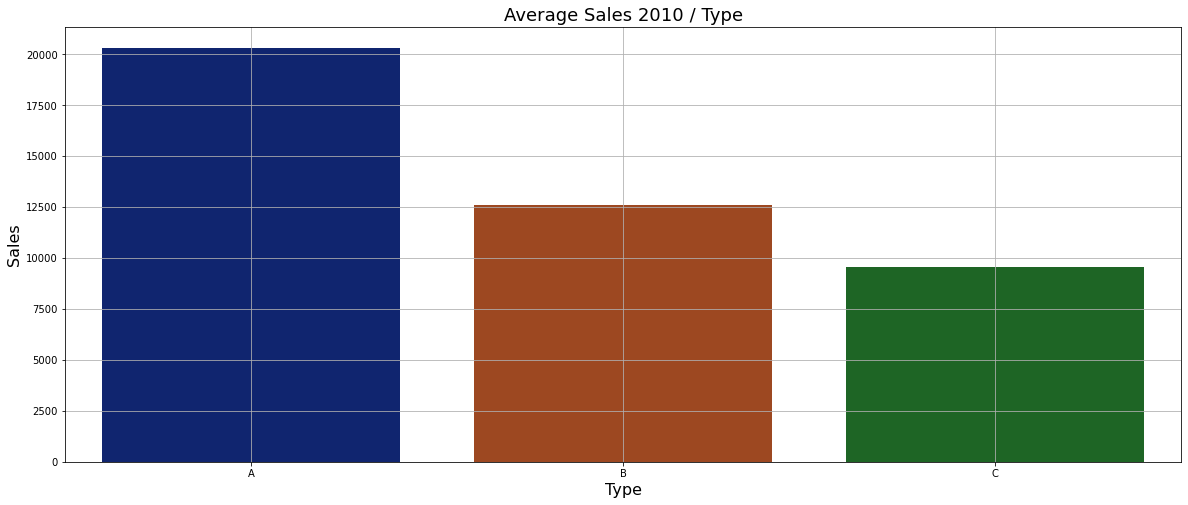

In [36]:
mean_sales_Type_2010 = weekly_sales_2010['Weekly_Sales'].groupby(weekly_sales_2010['Type']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Type_2010.index, mean_sales_Type_2010.values, palette='dark')
plt.grid()
plt.title('Average Sales 2010 / Type', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
plt.savefig('Average Sales_2010_Type.png')
plt.show()

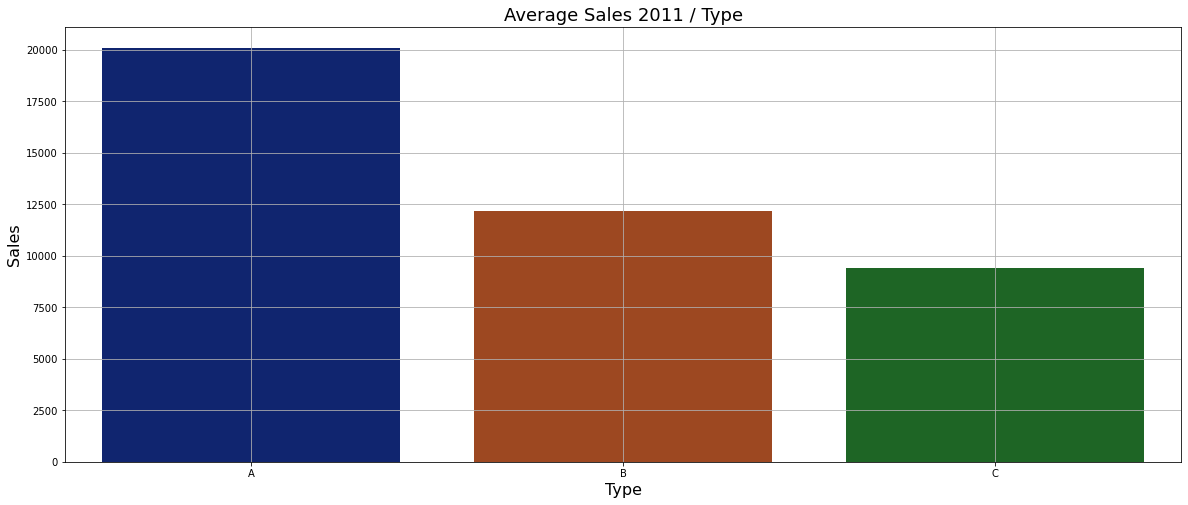

In [37]:
mean_sales_Type_2011 = weekly_sales_2011['Weekly_Sales'].groupby(weekly_sales_2011['Type']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Type_2011.index, mean_sales_Type_2011.values, palette='dark')
plt.grid()
plt.title('Average Sales 2011 / Type', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
plt.savefig('Average Sales_2011_Type.png')
plt.show()

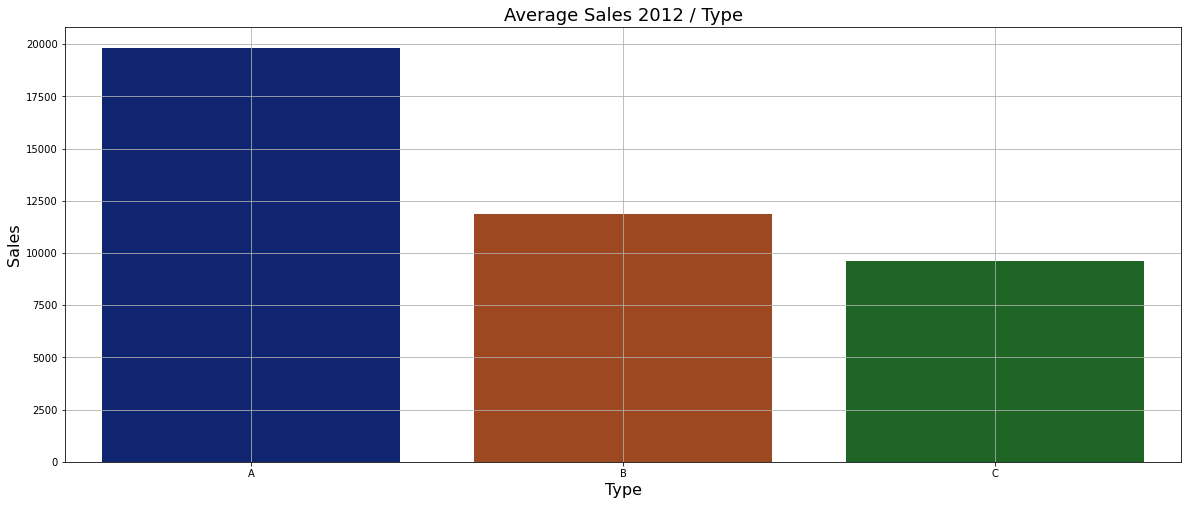

In [38]:
mean_sales_Type_2012 = weekly_sales_2012['Weekly_Sales'].groupby(weekly_sales_2012['Type']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Type_2012.index, mean_sales_Type_2012.values, palette='dark')
plt.grid()
plt.title('Average Sales 2012 / Type', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
plt.savefig('Average Sales_2012_Type.png')
plt.show()

Store vs Weekly_Sales

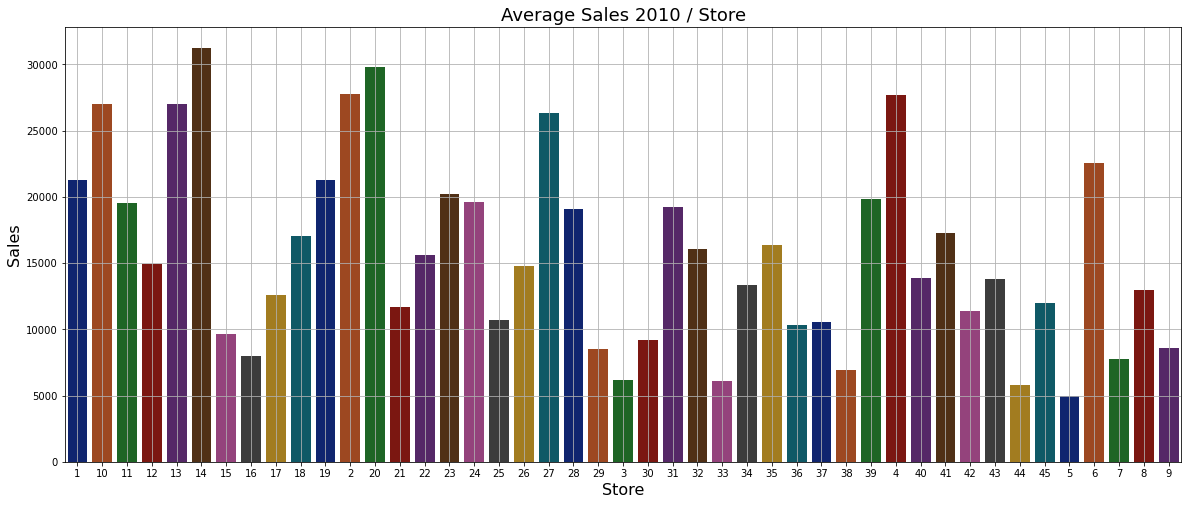

In [39]:
mean_sales_Store_2010 = weekly_sales_2010['Weekly_Sales'].groupby(weekly_sales_2010['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Store_2010.index, mean_sales_Store_2010.values, palette='dark')
plt.grid()
plt.title('Average Sales 2010 / Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('Average Sales 2010_Store.png')
plt.show()

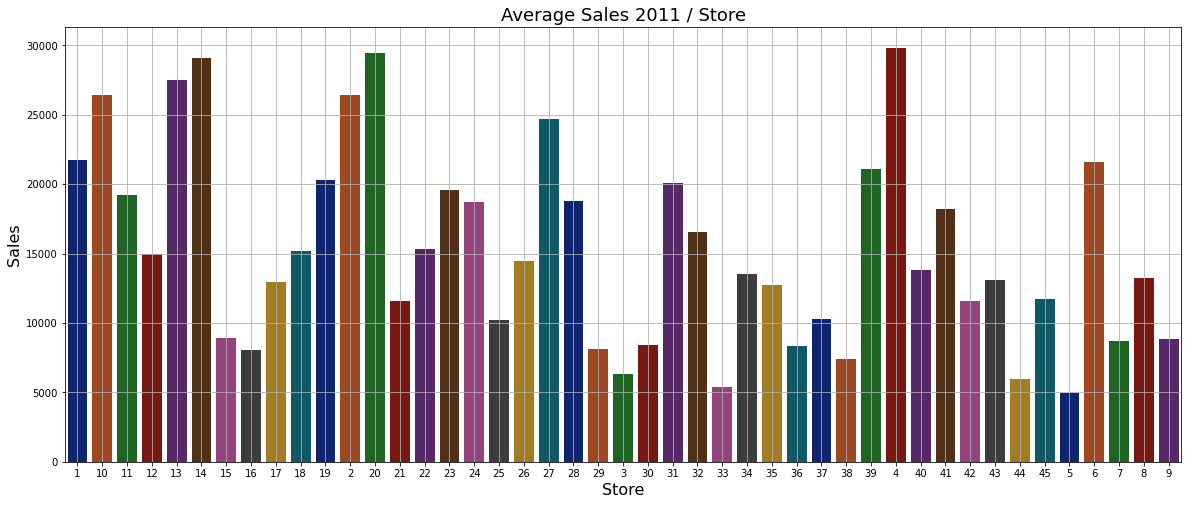

In [40]:
mean_sales_Store_2011 = weekly_sales_2011['Weekly_Sales'].groupby(weekly_sales_2011['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Store_2011.index, mean_sales_Store_2011.values, palette='dark')
plt.grid()
plt.title('Average Sales 2011 / Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('Average Sales 2011_Store.png')
plt.show()

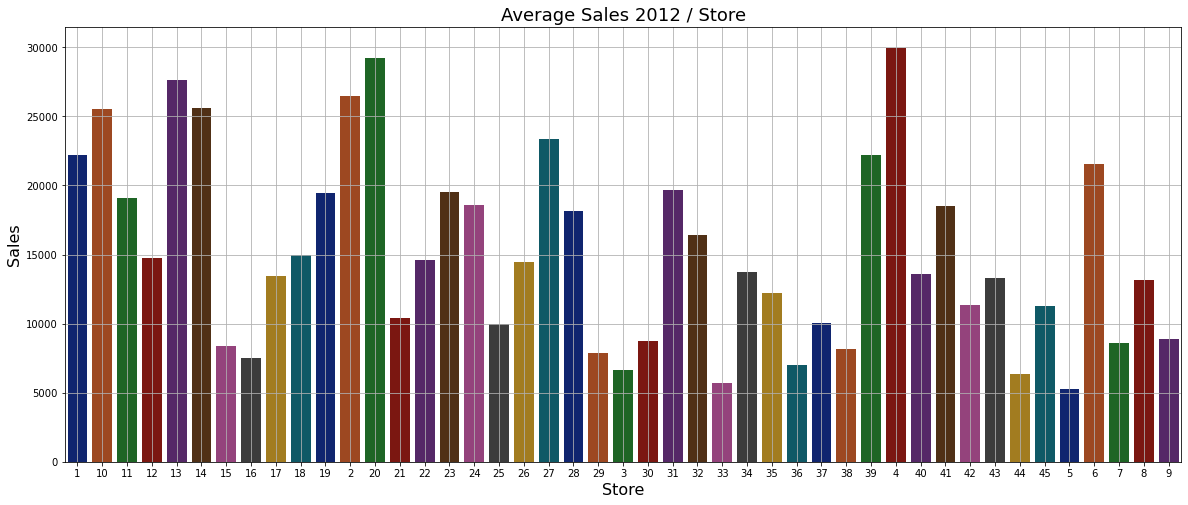

In [41]:
mean_sales_Store_2012 = weekly_sales_2012['Weekly_Sales'].groupby(weekly_sales_2012['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Store_2012.index, mean_sales_Store_2012.values, palette='dark')
plt.grid()
plt.title('Average Sales 2012 / Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('Average Sales 2012_Store.png')
plt.show()

In [42]:
mean_sales_Store_2012.sort_values(ascending=False).head(10)

Store
4     29974.536103
20    29250.312400
13    27631.438821
2     26451.377920
14    25625.876327
10    25506.559159
27    23373.433903
39    22228.631191
1     22179.531063
6     21572.884515
Name: Weekly_Sales, dtype: float64

In [43]:
mean_sales_Store_2011.sort_values(ascending=False).head(10)

Store
4     29831.442892
20    29462.715225
14    29115.332245
13    27473.722294
2     26443.518750
10    26398.957764
27    24657.372369
1     21718.174673
6     21606.858854
39    21102.089474
Name: Weekly_Sales, dtype: float64

In [44]:
mean_sales_Store_2010.sort_values(ascending=False).head(10)

Store
14    31257.333248
20    29790.067561
2     27794.009390
4     27709.374692
10    26984.347961
13    26981.799901
27    26319.642272
6     22554.932754
1     21283.424920
19    21253.449089
Name: Weekly_Sales, dtype: float64

Dept vs Weekly_Sales

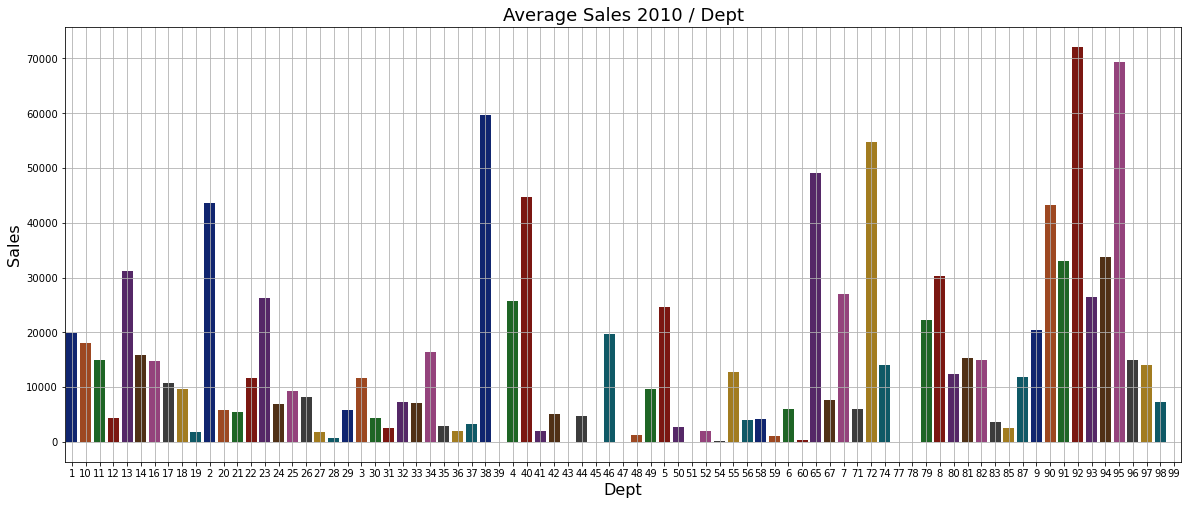

In [45]:
mean_sales_Dept_2010 = weekly_sales_2010['Weekly_Sales'].groupby(weekly_sales_2010['Dept']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Dept_2010.index, mean_sales_Dept_2010.values, palette='dark')
plt.grid()
plt.title('Average Sales 2010 / Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.savefig('Average Sales 2010_Dept.png')
plt.show()

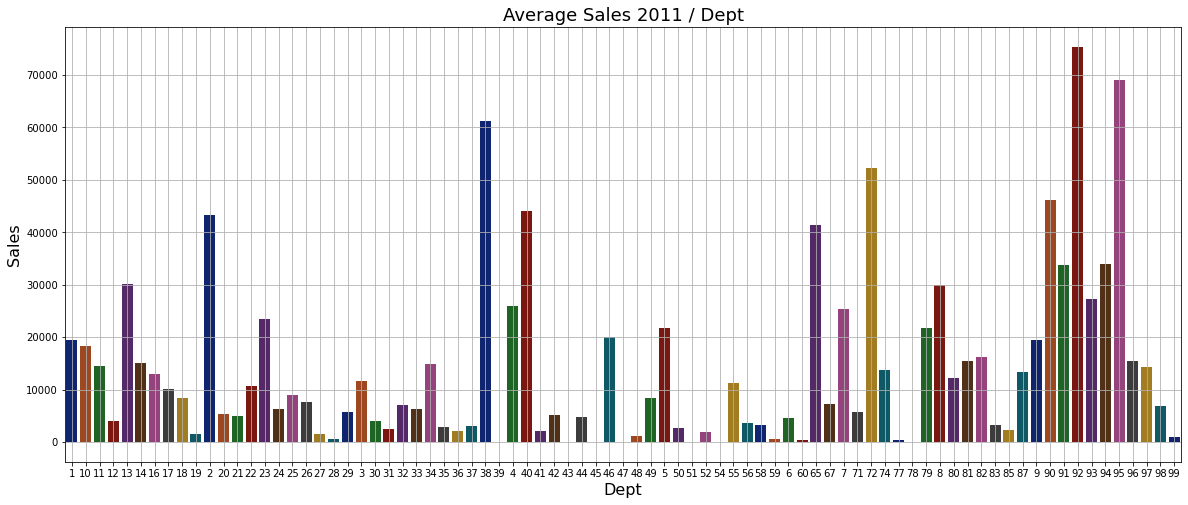

In [46]:
mean_sales_Dept_2011 = weekly_sales_2011['Weekly_Sales'].groupby(weekly_sales_2011['Dept']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Dept_2011.index, mean_sales_Dept_2011.values, palette='dark')
plt.grid()
plt.title('Average Sales 2011 / Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.savefig('Average Sales 2011_Dept.png')
plt.show()

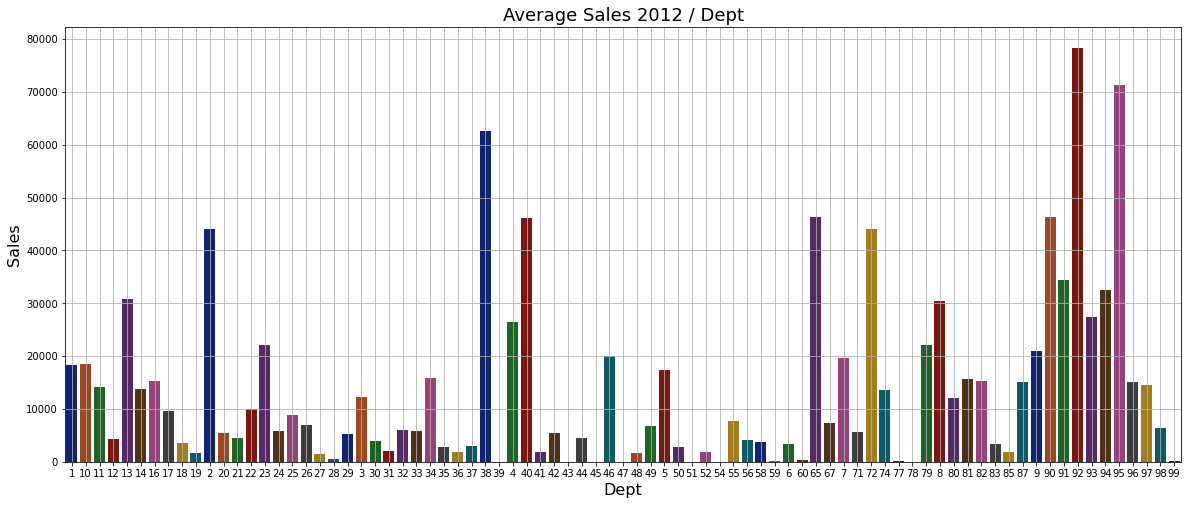

In [47]:
mean_sales_Dept_2012 = weekly_sales_2012['Weekly_Sales'].groupby(weekly_sales_2012['Dept']).mean()
plt.figure(figsize=(20,8))
sns.barplot(mean_sales_Dept_2012.index, mean_sales_Dept_2012.values, palette='dark')
plt.grid()
plt.title('Average Sales 2012 / Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.savefig('Average Sales 2012_Dept.png')
plt.show()

7-  Diagramme de décomposition Série Temporelle de Weekly_Sales
- j'effectue au préable une analyse chronologique pour avoir une vison globale de l'évolution des ventes dans le temps

Séries Temporelles

In [48]:
# je définie les date comme index
new_index =sales.index

In [49]:
sales.index = sales['Date']

In [50]:
# étant difficile de travailler avec les données hebdomadaires j'utilise plutôt les moyennes mensuelles de ventes 
y = sales['Weekly_Sales'].resample('MS').mean()

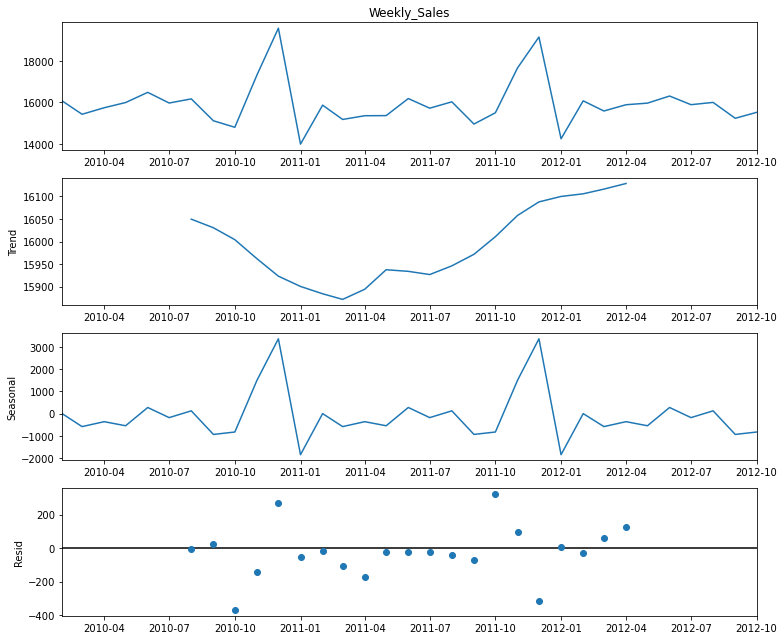

In [51]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.savefig('Séries_Temporelles_Weekly_Sales.png')
plt.show()

In [52]:
sales.index = new_index

Interprétation:  
- En terme de saisonnalité on remarque une hausse exponentiel des ventes en fin d'années 2010 et 2011 on peut déduire que cela est dû au fetes de fin d'années jusq'en janvier. une remontée des ventes au mois de fevrier.
- en terme de tendance la courbe de vente est en hausse entre mars 2011 et avril 2012

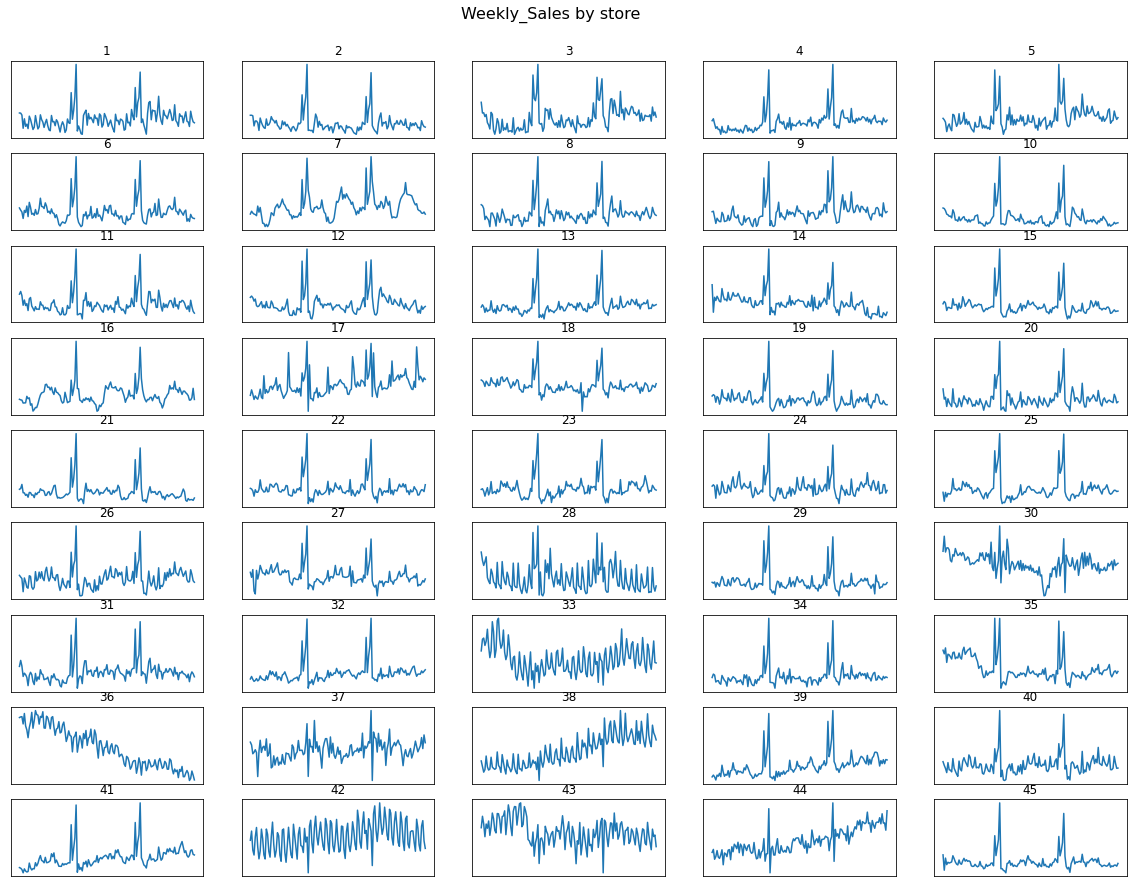

In [53]:
fig = plt.figure(figsize = (20,15))
fig.suptitle('Weekly_Sales by store\n ',y = 0.93,  fontsize = 16)
Storelist = sales['Store'].unique().tolist() 
for store in Storelist:
    salesd=sales[sales.Store == store].groupby(sales['Date']).Weekly_Sales.sum()
    ax = fig.add_subplot(9,5,int(store))
    ax.plot(salesd)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(store)
plt.savefig('Weekly_Sales_store.png')
plt.show()

# Relation entre weekly_sales/variables.  

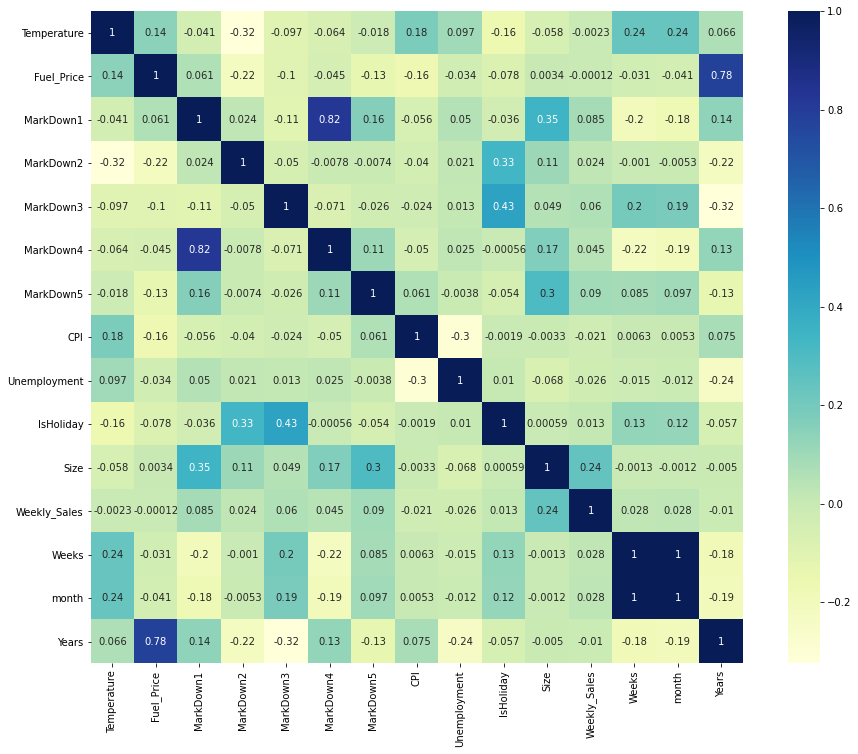

In [54]:
plt.figure(figsize=(16,12))
sns.heatmap(sales.corr(), cmap="YlGnBu", annot=True, square=True)
plt.savefig('Matrix_correlation.png')
plt.show()

Interprétation: 
- une forte relation entre markdown 1 et markdown 4. Les différentes démarques ont une faible corrélation avec la variable cible(Weekly_sales).
-  il y a  une relation positive mais faible entre les ventes et la taille du magasin. ainsi qu'entre l'indice de prix à la consommation et et les temperatures. une relation négative entre les ventes le taux de chomage , CPI et les température.

- il n'y a pas une forte relation entre nos variable et notre target. Néamoins on pourrait chercher à savoir:

  * si les les ventes sont plus fortes les semaines fériés  TEST ANOVA

  * Les ventes sont-elles différentes d'un type de magasin à un autre (type et Weekly_Sales) TEST ANOVA
 
    

# Pairplot 

je vais segmenter mon dataset pour faire des pairplot compréhensible et avoir les relation entre variable

In [55]:
Markdown_weekly_sales = sales[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']]
var_con = sales[['Temperature','Fuel_Price','CPI','Unemployment','Size','Weekly_Sales']]
var_cat = sales[['Store','IsHoliday','Type','Dept','Weekly_Sales']]

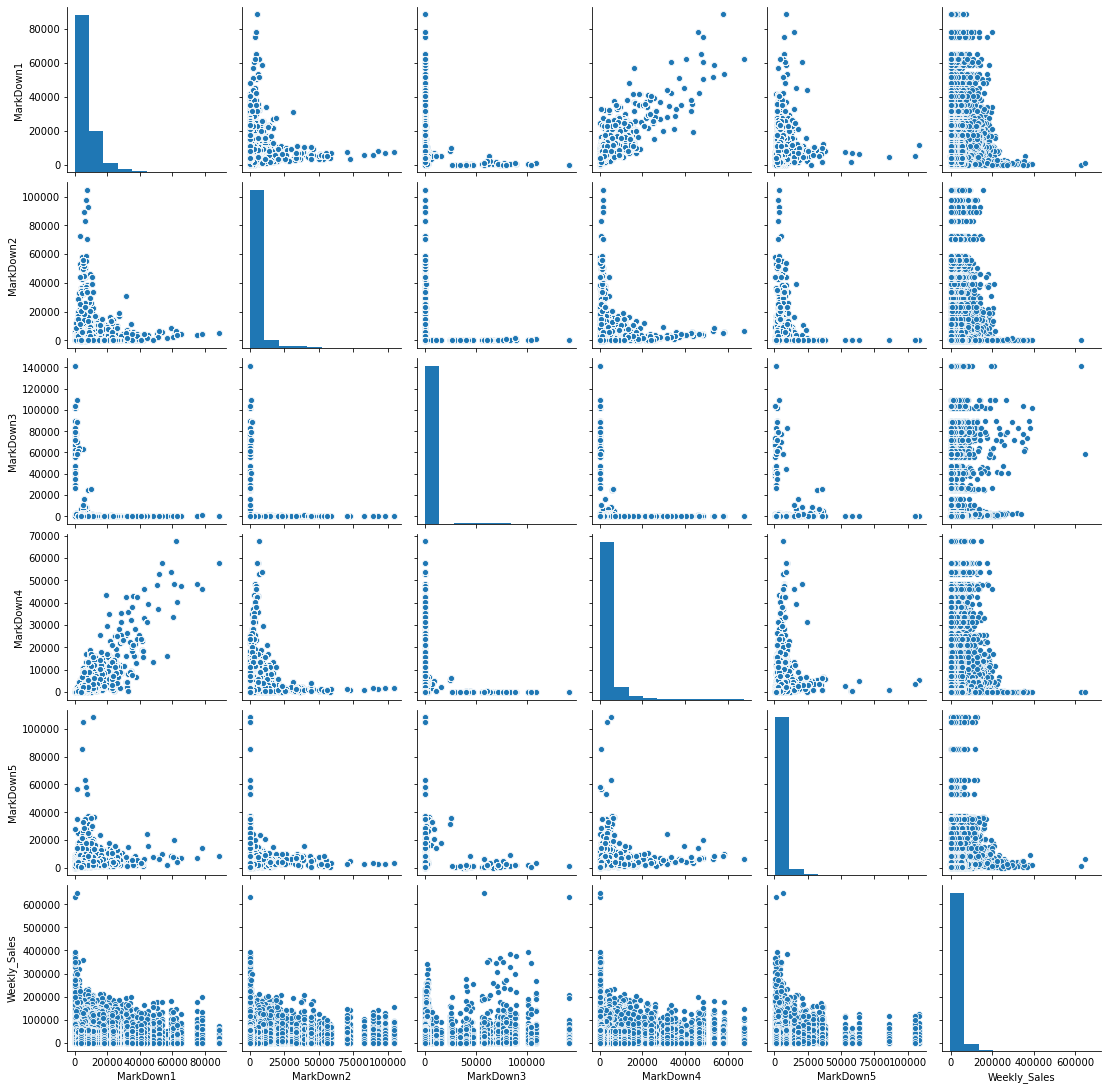

In [56]:
sns.pairplot(Markdown_weekly_sales)

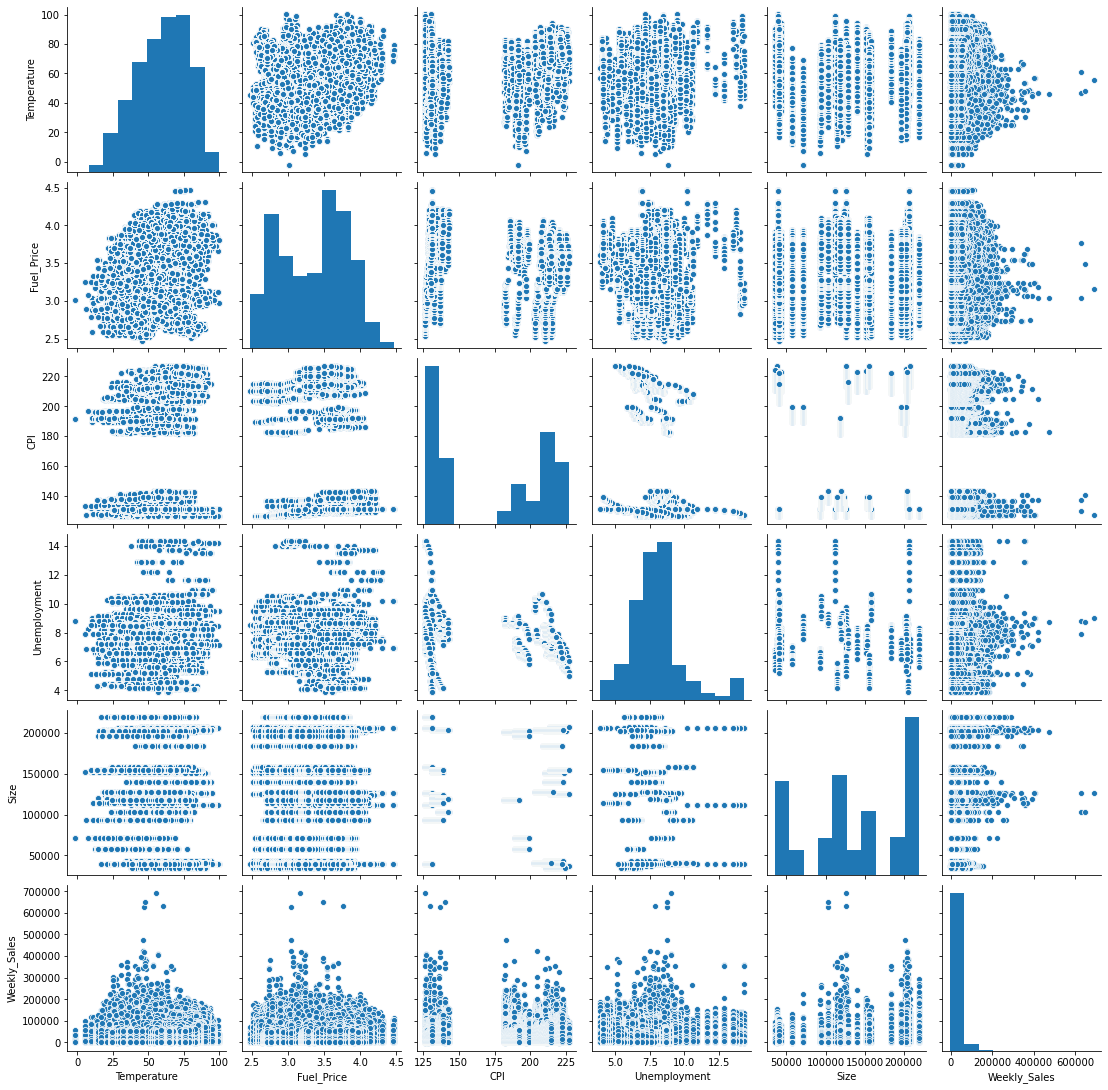

In [57]:
sns.pairplot(var_con)

les ventes sont-elles différentes d'un type de magasin à un autre (type et Weekly_Sales) TEST ANOVA
Hypothèse nulle : il n'y a pas de différence significatives entre les ventes et le type de magasin.
H1: Il existe une différence significative entre les les ventes_ moyennes et les types de magasin.

In [58]:
Weekly_Sales = sales['Weekly_Sales']
Type = sales['Type']
Type_Weekly_Sales = sales[['Type','Weekly_Sales']].groupby('Type').groups

A = Type_Weekly_Sales['A']
B = Type_Weekly_Sales['B']
C= Type_Weekly_Sales['C']

In [59]:
from scipy.stats import f_oneway
stats.f_oneway(A,B,C)

F_onewayResult(statistic=52300.90585616895, pvalue=0.0)

In [60]:
Weekly_Sales = sales['Weekly_Sales']
IsHoliday = sales['IsHoliday']
IsHoliday_Weekly_Sales = sales[['IsHoliday','Weekly_Sales']].groupby('IsHoliday').groups
IsHoliday_Weekly_Sales
Isholiday_False = IsHoliday_Weekly_Sales[False]
Isholiday_True = IsHoliday_Weekly_Sales[True]

In [61]:
stats.f_oneway(Isholiday_False,Isholiday_True)

F_onewayResult(statistic=0.3014082001395321, pvalue=0.5830012406584001)

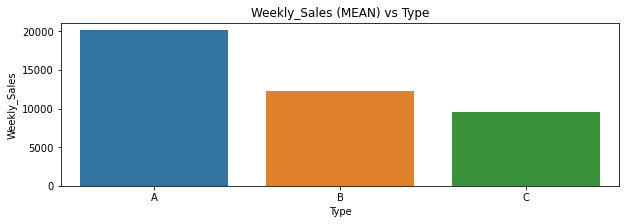

In [62]:
fig= plt.figure(figsize = (10,3))
Type_Weekly_Sales = sales[['Type','Weekly_Sales']].groupby('Type').mean().reset_index()
ax = sns.barplot(y = Type_Weekly_Sales.Weekly_Sales, x = Type_Weekly_Sales.Type)
plt.title('Weekly_Sales (MEAN) vs Type');

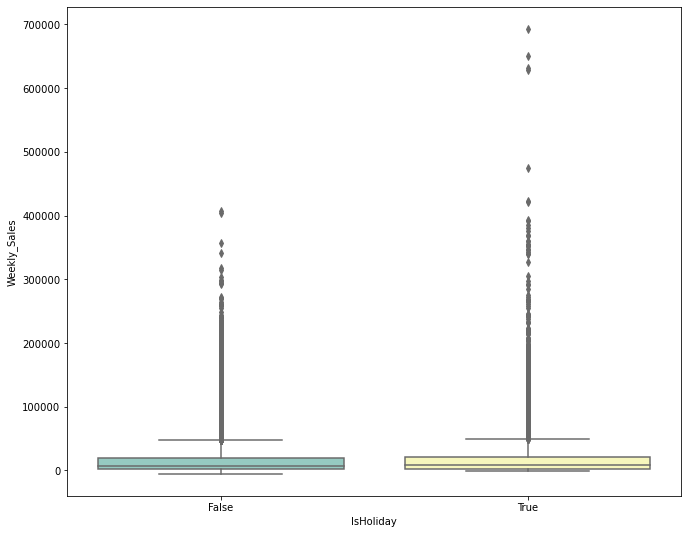

In [63]:
sns.boxplot(x= 'IsHoliday', y= 'Weekly_Sales',  data =sales, palette= 'Set3')

In [64]:
#fig= plt.figure(figsize = (5,3))
#IsHoliday_Weekly_Sales = sales_train[['IsHoliday','Weekly_Sales']].groupby('IsHoliday').mean().reset_index()
#ax = sns.barplot(y = IsHoliday_Weekly_Sales.Weekly_Sales, x = IsHoliday_Weekly_Sales.IsHoliday)
#plt.title('Weekly_Sales (MEAN) vs IsHoliday');


Relation entre les jours férié et les ventes_Hebdo

Interprétation : la nous pouvons déduire qu'il y a pas de relation entre les types de magasin et les vente par semaine

# Preprocessing

 Labelisation 

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder_type = LabelEncoder()
sales['Type'] = encoder_type.fit_transform(sales['Type'].values)

In [66]:
encoder_test_type = LabelEncoder()
sales_main_test['Type'] = encoder_test_type.fit_transform(sales_main_test['Type'].values)

In [67]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
sales['IsHoliday'] = encoder.fit_transform(sales['IsHoliday'].values)
#sales_train['IsHoliday_Encode'] = sales_train['IsHoliday']

In [68]:
encoder_sales_main_test = LabelEncoder()
sales_main_test['IsHoliday'] = encoder_sales_main_test.fit_transform(sales_main_test['IsHoliday'].values)

In [69]:
sales.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'Weeks', 'month',
       'Years'],
      dtype='object')

 Suppression des variables

les variables MarkDown 1-5 sont les seules a avoir des NA qui sont à plus de 50%. N'ayant pas significations je préfère les supprimer. De plus les variables Size, Température, Type,CPI ne sont pas utiles pour la suite.

In [70]:
sales.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Temperature', 'Fuel_Price','Size'], axis =1, inplace = True)

In [71]:
sales_main_test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Temperature', 'Fuel_Price','Size'], axis =1, inplace = True)

In [80]:
sales

,Store,Date,IsHoliday,Type,Dept,Weekly_Sales,Weeks,month,Years
0,1,2010-02-05,0,0,1,24924.50,5,2,2010
1,1,2010-02-05,0,0,2,50605.27,5,2,2010
2,1,2010-02-05,0,0,3,13740.12,5,2,2010
3,1,2010-02-05,0,0,4,39954.04,5,2,2010
4,1,2010-02-05,0,0,5,32229.38,5,2,2010
...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,0,1,93,2487.80,43,10,2012
421566,45,2012-10-26,0,1,94,5203.31,43,10,2012
421567,45,2012-10-26,0,1,95,56017.47,43,10,2012
421568,45,2012-10-26,0,1,97,6817.48,43,10,2012


In [76]:
sales_main_test.Date.nunique()

39

# Machine Learning


On se rend compte qu'on a 39 semaines à prédire dans le fichier test et 143 dans le fichier principale. pour la suite ce que nous allons faire c'est prédire les 39 dernières semaines du fichier sales.

# Train test split

In [83]:
from sklearn.model_selection import train_test_split

Predict_date = pd.to_datetime(sales.Date.unique()[-sales_main_test.Date.nunique()]).strftime('%Y-%m-%d')


new_train = sales[sales.Date<Predict_date]
new_test = sales[sales.Date>=Predict_date]


X_new_train = new_train.drop(['Date','Weekly_Sales'], axis=1)
X_new_test = new_test.drop(['Date','Weekly_Sales'], axis=1)

y_new_train = new_train['Weekly_Sales']
y_new_test = new_test['Weekly_Sales']

Features scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_new_train)
X_new_train_sc = mms.transform(X_new_train)
X_new_test_sc = mms.transform(X_new_test) 

afin d'implémenter notre modèle de ML. nous appliquerons tout d'abors un modèle de regression linéaire ensuite un modèle RandomForest en fonction des résultats nous déterminerons celui qui fonction mieux.

# Modélisation

Regression Linear

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
# utiliser un modèle d'apprentissage
regr_Fit= regr.fit(X_new_train_sc,y_new_train)
y_pred = regr_Fit.predict(X_new_test_sc)

lr_rmse_score = np.sqrt(mean_squared_error(y_new_test,y_pred))
lr_r2_score = r2_score(y_new_test,y_pred)

print("Root Mean Squared Error :",lr_rmse_score)
print("R2Score :",lr_r2_score)



Root Mean Squared Error : 21472.147522893407
R2Score : 0.06183898909914287


In [87]:
#plot results :

sales_pr = pd.DataFrame({'Weekly_Sales':y_new_test.values,'Weekly_Sales_Pred':y_pred },index=y_new_test.index)
sales_pred = pd.merge(sales_pr,sales[['Date','Store','Dept']], left_index = True, right_index = True, how = 'left')

#plt.scatter(y_train,y_val,  color='black')
#plt.plot(X_val, y_pred,color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

In [89]:
sales_pred.head(2)

,Weekly_Sales,Weekly_Sales_Pred,Date,Store,Dept
7455,23510.49,15316.147797,2012-02-03,1,1
7456,54322.24,15425.978377,2012-02-03,1,2


C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


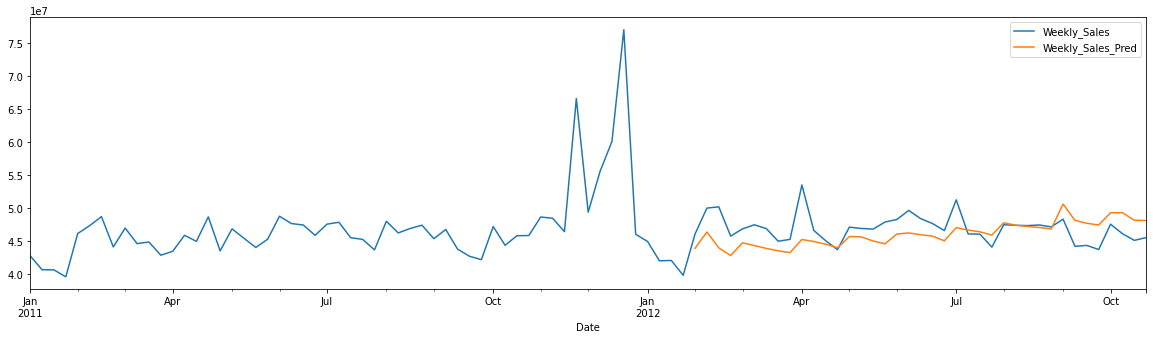

In [90]:
pred_plot = sales_pred.groupby('Date')['Weekly_Sales','Weekly_Sales_Pred'].sum()
act_plot = sales.groupby('Date')['Weekly_Sales'].sum()

ax = act_plot[act_plot.index>'2011-01-01'].plot(figsize = (20,5), legend = True)
pred_plot['Weekly_Sales_Pred'].plot(legend = True)

Random Forest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()

In [94]:
model_RF_Fit = model_RF.fit(X_new_train_sc,y_new_train)          
y_pred_RF = model_RF_Fit.predict(X_new_test_sc)


In [97]:
rf_rmse_score = np.sqrt(mean_squared_error(y_new_test,y_pred_RF))
rf_r2_score = r2_score(y_new_test,y_pred_RF)

print("Root Mean Squared Error :",rf_rmse_score)
print("R2Score :",rf_r2_score)


Root Mean Squared Error : 3445.5605144096835
R2Score : 0.9758428231221206


In [98]:
#plot results :

sales_pr_rf = pd.DataFrame({'Weekly_Sales':y_new_test.values,'Weekly_Sales_Pred':y_pred_RF },index=y_new_test.index)
sales_pred_rf = pd.merge(sales_pr_rf,sales[['Date','Store','Dept']], left_index = True, right_index = True, how = 'left')

#plt.scatter(y_train,y_val,  color='black')
#plt.plot(X_val, y_pred,color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

In [101]:
sales_pred_rf.head(2)

,Weekly_Sales,Weekly_Sales_Pred,Date,Store,Dept
7455,23510.49,23933.5141,2012-02-03,1,1
7456,54322.24,47681.8587,2012-02-03,1,2


C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


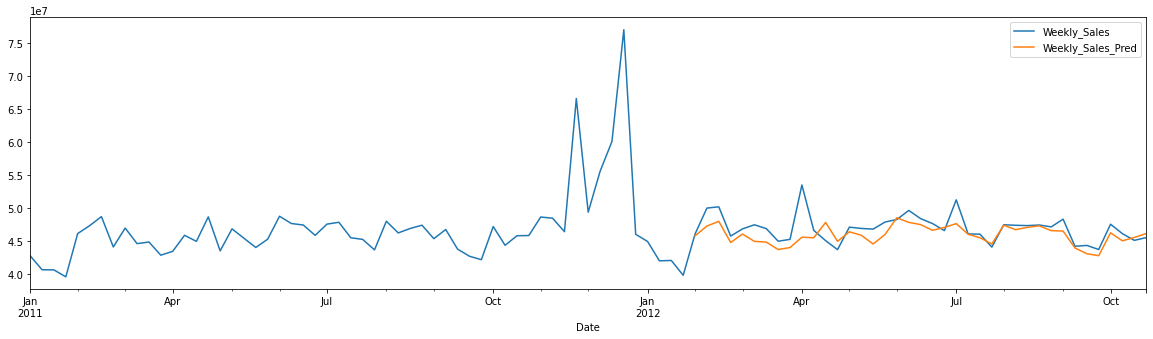

In [102]:
pred_plot_rf = sales_pred_rf.groupby('Date')['Weekly_Sales','Weekly_Sales_Pred'].sum()
act_plot = sales.groupby('Date')['Weekly_Sales'].sum()

ax = act_plot[act_plot.index>'2011-01-01'].plot(figsize = (20,5), legend = True)
pred_plot_rf['Weekly_Sales_Pred'].plot(legend = True)

KNN

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_fit = knn.fit(X_new_train_sc,y_new_train)          
y_pred_knn = knn_fit.predict(X_new_test_sc)


knn_rmse_score = np.sqrt(mean_squared_error(y_new_test,y_pred_knn))
knn_r2_score = r2_score(y_new_test,y_pred_knn)

print("Root Mean Squared Error :",knn_rmse_score)
print("R2Score :",knn_r2_score)

Root Mean Squared Error : 12649.259473375452
R2Score : 0.6744208251381807


In [104]:
sales_pr_knn = pd.DataFrame({'Weekly_Sales':y_new_test.values,'Weekly_Sales_Pred':y_pred_knn },index=y_new_test.index)
sales_pred_knn = pd.merge(sales_pr_rf,sales[['Date','Store','Dept']], left_index = True, right_index = True, how = 'left')


In [105]:
sales_pred_knn.head(2)

,Weekly_Sales,Weekly_Sales_Pred,Date,Store,Dept
7455,23510.49,23933.5141,2012-02-03,1,1
7456,54322.24,47681.8587,2012-02-03,1,2


C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


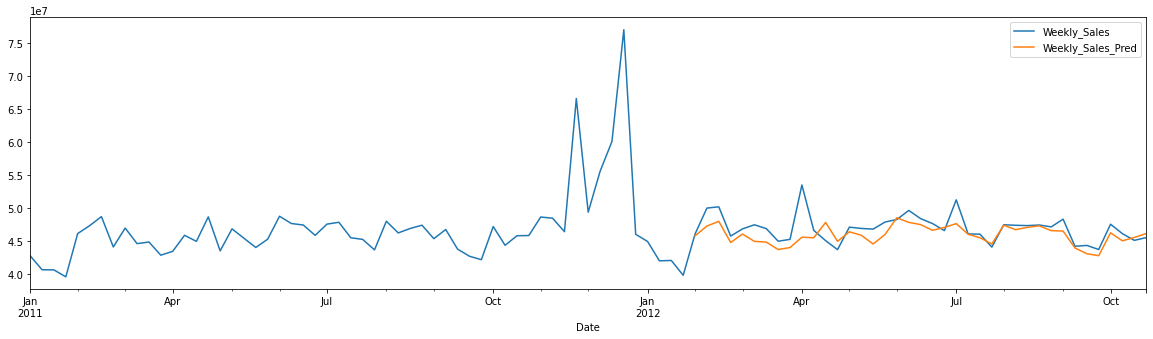

In [106]:
pred_plot_knn = sales_pred_knn.groupby('Date')['Weekly_Sales','Weekly_Sales_Pred'].sum()
act_plot = sales.groupby('Date')['Weekly_Sales'].sum()

ax = act_plot[act_plot.index>'2011-01-01'].plot(figsize = (20,5), legend = True)
pred_plot_knn['Weekly_Sales_Pred'].plot(legend = True)

# Conclusion :

Le modèle RandomForest est le plus approprié pour notre apprentissage.
